### Imports

In [1]:
import librosa
import librosa.display
import numpy as np
import matplotlib.pyplot as plt
import json
import timeit
from IPython.display import Audio, display
from librosa.display import waveshow, specshow
import soundfile

### Constants

In [2]:
# path of a random sample
FILE_PATH = './data/train/clean/p237_084.wav'

# sampling rate
sr = 22050

### Visualizing a sample from data

Sampling rate: 22050
Shape of signal: (67253,)
First 5 values from the signal: [0.00137712 0.0021587  0.00205419 0.00194848 0.00218606]
Max amplitude of signal 0.4986570477485657
Min amplitude of signal -0.4681963324546814


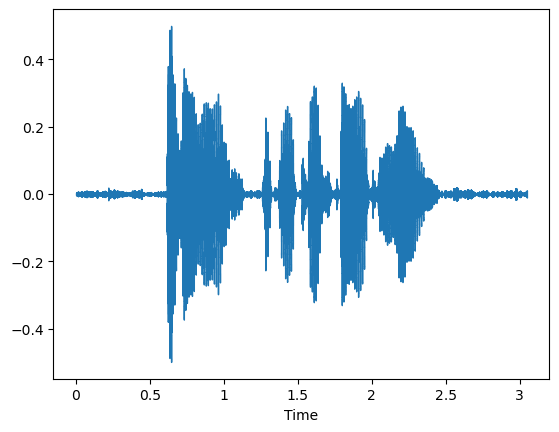

In [3]:
# loading the sample
signal, sr = librosa.load(FILE_PATH, sr = sr) # default sampling rate: 22050Hz

print(f'Sampling rate: {sr}')
print(f'Shape of signal: {signal.shape}')

print('First 5 values from the signal:', end = ' ')
print(signal[0: 5])

print(f'Max amplitude of signal {np.max(signal)}')
print(f'Min amplitude of signal {np.min(signal)}')

waveshow(signal, sr = sr)

#### Listen to the audio sample:

In [4]:
# male speaker saying: "otherwise it will cost a lot of money"
Audio(data = signal, rate = sr)

### Checking how scaling the aplitude affects the sound

Play the scaled sample:


The scaled sample loaded again


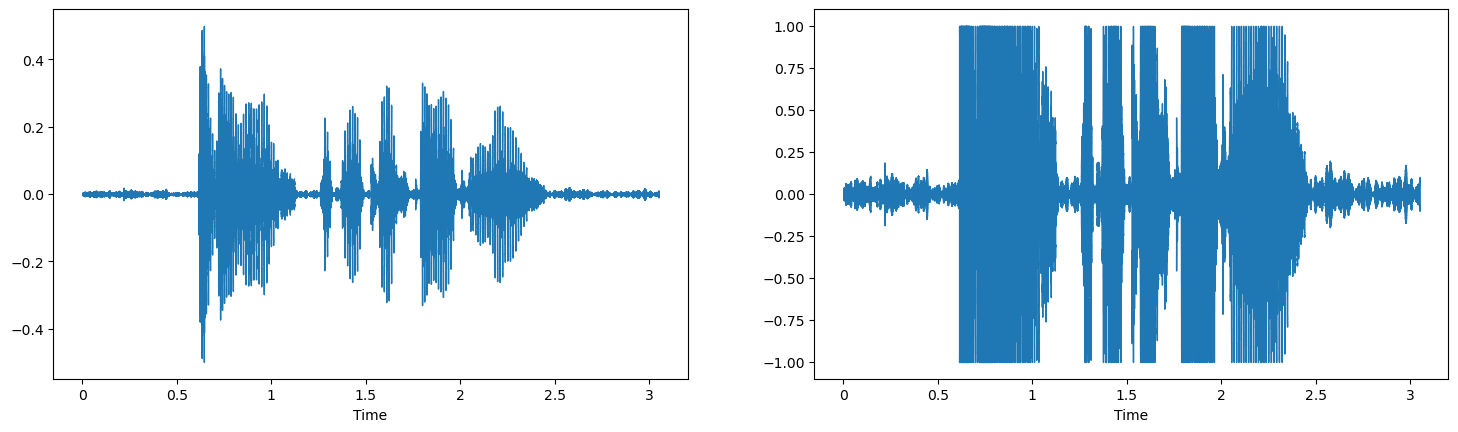

In [5]:
scaled_signal = signal * 10 # signal is the original sample

# play the scaled signal
print('Play the scaled sample:')
display(Audio(data = scaled_signal, rate = sr))

# this sounds the same as the original signal: 
# reason: Ipython.display.Audio normalizes all the signals before playing
# hence, scaliing will not affect the amplitude values

# to see the effect we can save the file and use the local media player
soundfile.write('scaled_signal.wav', scaled_signal, sr)

# loading the scaled signal again
scaled_signal, sr = librosa.load('scaled_signal.wav', sr = sr)

print('The scaled sample loaded again')
display(Audio(data = scaled_signal, rate = sr))

# we can see that the effect of scaling is visible when we load it again using librosa
# but why?

fig, axs = plt.subplots(1, 2)
fig.set_figwidth(18)

waveshow(signal, sr = sr, ax = axs[0])
waveshow(scaled_signal, sr = sr, ax = axs[1])

### Random Noise

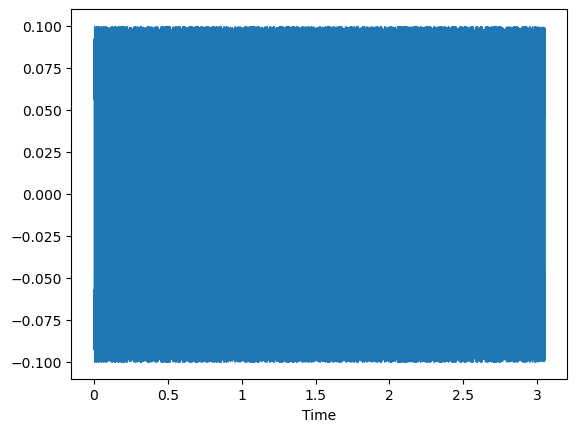

In [6]:
# randomly sampling points from a uniform distribution, n_samples is same as signal
random_sound = np.random.uniform(0, 0.1, signal.size)

# waveform of noise
waveshow(random_sound, sr = sr)

# listen to the noise
Audio(data = random_sound, rate = sr)

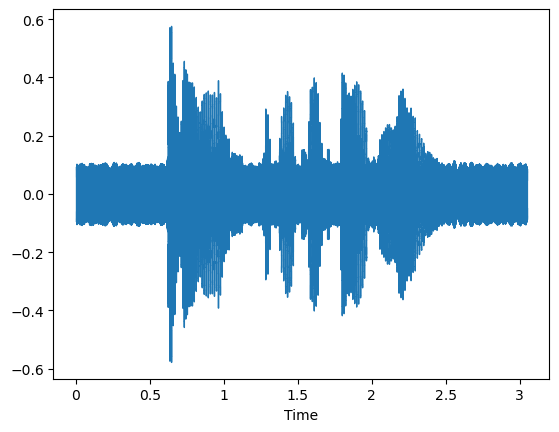

In [7]:
# Adding uniform noise to the sample
noisy_signal = signal + random_sound

# Waveform of noisy signal
waveshow(noisy_signal, sr = sr)

# Listen to the noisy signal
Audio(data = noisy_signal, rate = sr)

### Spectrum

In [8]:
dft = np.fft.rfft(signal)

amplitude = np.abs(dft)
amplitude_db = librosa.amplitude_to_db(amplitude, ref=np.max)

print(dft.shape)
print(amplitude_db[:5])

(33627,)
[-69.16081143 -47.68194317 -47.74352115 -46.07312865 -51.1185477 ]


In [9]:
frequency = librosa.fft_frequencies(sr = sr, n_fft = signal.size)

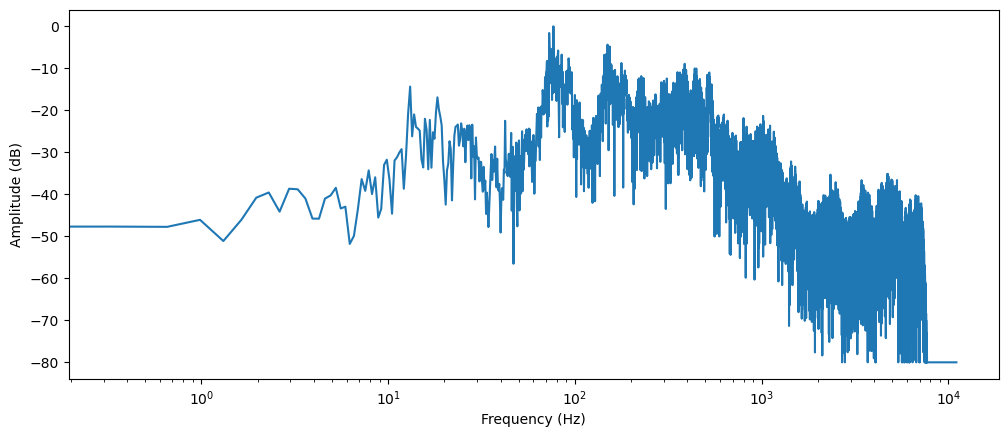

In [10]:
plt.figure().set_figwidth(12)
plt.plot(frequency, amplitude_db)
plt.xlabel("Frequency (Hz)")
plt.ylabel("Amplitude (dB)")
plt.xscale("log")

### Windowing

In [11]:
windowed_input = np.hanning(signal.size) * signal

dft = np.fft.rfft(windowed_input)

amplitude = np.abs(dft)
amplitude_db = librosa.amplitude_to_db(amplitude, ref=np.max)

print(dft.shape)
print(amplitude_db[:5])

(33627,)
[-51.19292964 -56.83608083 -51.55581283 -45.87128598 -47.96559561]


In [12]:
frequency = librosa.fft_frequencies(sr = sr, n_fft = signal.size)

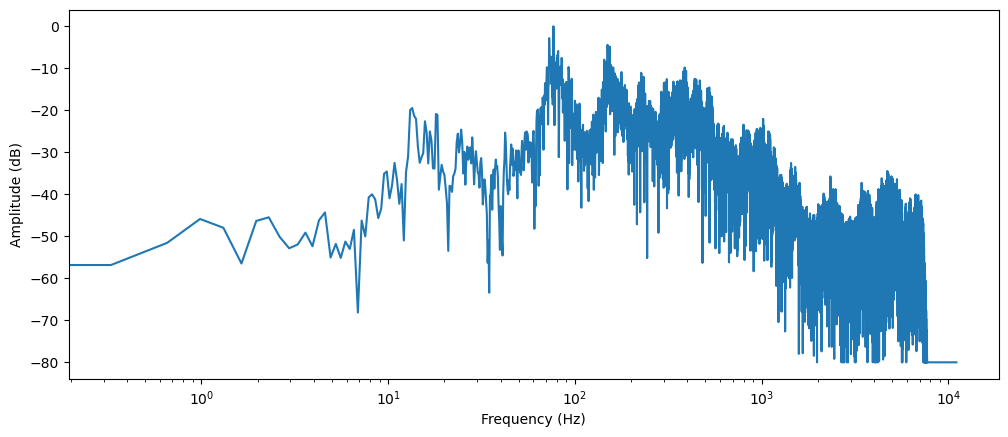

In [13]:
plt.figure().set_figwidth(12)
plt.plot(frequency, amplitude_db)
plt.xlabel("Frequency (Hz)")
plt.ylabel("Amplitude (dB)")
plt.xscale("log")

### Spectrogram

/home/saturnbored/anaconda3/lib/python3.9/site-packages/librosa/util/decorators.py:88: UserWarning: Trying to display complex-valued input. Showing magnitude instead.
  return f(*args, **kwargs)


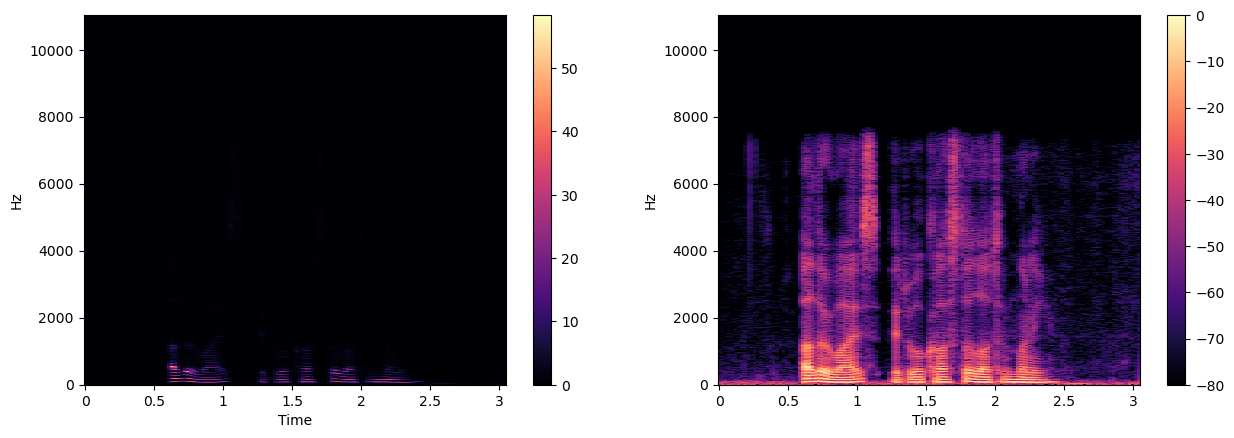

In [14]:
# generating spectrogram using short-time fourier-transform
spec = librosa.stft(signal)

# converting amplitude values to decibels
spec_db = librosa.amplitude_to_db(np.abs(spec), ref = np.max)

# displaying the spectrograms
fig, axs = plt.subplots(1, 2)
fig.set_figwidth(15)

plt.colorbar(specshow(spec, x_axis = 'time', y_axis = 'hz', ax = axs[0]), ax = axs[0])
plt.colorbar(specshow(spec_db, x_axis = 'time', y_axis = 'hz', ax = axs[1]))

### Getting Audio Back

In [15]:
# the original signal
print('The original Audio:')
display(Audio(data = signal, rate = sr))

# using griffinlim algorithm for np.abs(spec)
spec_signal_gl = librosa.griffinlim(np.abs(spec))
print('Audio with GriffinLim on spectrogram:')
display(Audio(data = spec_signal_gl, rate = sr))

# using griffinlim algoithm for spec-db
spec_db_signal_gl = librosa.griffinlim(np.abs(spec_db))
print('Audio with GriffinLim on db-spectrogram:')
display(Audio(data = spec_db_signal_gl, rate = sr))

# using inverse-stft on spec
inv_spec = librosa.istft(spec)
print('Audio with inverse-stft:')
display(Audio(data = inv_spec, rate = sr))

# using inverse-stft on abs-spec
inv_spec_abs = librosa.istft(np.abs(spec))
print('Audio with inverse-stft on abs-spec:')
display(Audio(data = inv_spec_abs, rate = sr))

# using inverse-stft on db-spec
inv_spec_db = librosa.istft(spec_db)
print('Audio with inverse-stft on db-spec:')
display(Audio(data = inv_spec_db, rate = sr))

# getting amplitude back from db
spec_abs = librosa.db_to_amplitude(spec_db)

# using inverse-stft on abs-spec
inv_spec_abs = librosa.istft(np.abs(spec))
print('Audio with inverse-stft on abs-spec:')
display(Audio(data = inv_spec_abs, rate = sr))

# using griffinlim algorithm for np.abs(spec)
spec_signal_gl = librosa.griffinlim(spec_abs)
print('Audio with GriffinLim on spectrogram:')
display(Audio(data = spec_signal_gl, rate = sr))

The original Audio:


Audio with GriffinLim on spectrogram:


Audio with GriffinLim on db-spectrogram:


Audio with inverse-stft:


Audio with inverse-stft on abs-spec:


Audio with inverse-stft on db-spec:


Audio with inverse-stft on abs-spec:


Audio with GriffinLim on spectrogram:


#### Note:
Clearly, applying Inverse-STFT on complex spectrogram returned from STFT gives the best results.

However, we cannot train our model using complex-spectrogram. So, we must use real-valued amplitude-spectrograms. 

On real-valued, amplitude-spectrograms we can clearly see that the GriffinLim algorithm gives the best results.

Also, converting to DB and then getting amplitudes back, doesn't worsen the performance much.